
    Assignment Session 2.5

This neural network does the following -

*Takes two inputs:*
1.   Takes an image from the MNIST dataset (say 5)
2.   Takes a random number between 0 and 9 (say 7)

*Gives two outputs:*
1.   The "number" that was represented by the MNIST image (ideally predicted as 5)
2.   The "sum" of predicted number (from the MNIST image) with the random number (Example - predicted (5) + random (7) = 12)


    Importing the required modules

In [1]:
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset

    Getting our dataset ready

In [2]:
# This section imports the training set of MNIST images
train_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


    Checking what we have got in our training set.

In [3]:
print('Total number of images in the training dataset is - ',len(train_set)) # We have 60000 sample images for training
sample = next(iter(train_set)) # get the first sample image and its label (This is a tuple of tensor and integer)
sample_img , sample_lbl = sample
print(f'Type of image is -  {sample_img.shape}')# Type of image is rank 3 tensor - 1x28x28
print(f'Type of label is -  {type(sample_lbl)}')# Type of label is integer

Total number of images in the training dataset is -  60000
Type of image is -  torch.Size([1, 28, 28])
Type of label is -  <class 'int'>


    Checking the first sample image and its label

label: 5


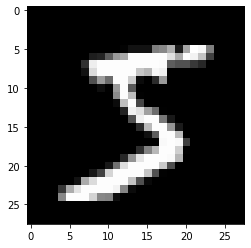

In [4]:
import matplotlib.pyplot as plt
plt.imshow(sample_img.reshape(28,28), cmap='gray')# We could have used squeeze() also but essentially it would have done the same thing.
num = print('label:', sample_lbl)

We also need to insert random numbers in our dataset. This random number would be passed as an input to predict an output which would be sum of label of the image and the random number itself.
The random number would be stored in the dataset in the form of one hot encoded tensor.

    The below function returns the one hot encoded tensor for the given random number.

In [41]:
def manual_one_hot_encoding (num):
  if num == 0:
    one_hot_en_val = torch.tensor([1,0,0,0,0,0,0,0,0,0],dtype = torch.float32)
  elif num == 1:
    one_hot_en_val = torch.tensor([0,1,0,0,0,0,0,0,0,0],dtype = torch.float32)
  elif num == 2:
    one_hot_en_val = torch.tensor([0,0,1,0,0,0,0,0,0,0],dtype = torch.float32)
  elif num == 3:
    one_hot_en_val = torch.tensor([0,0,0,1,0,0,0,0,0,0],dtype = torch.float32)
  elif num == 4:
    one_hot_en_val = torch.tensor([0,0,0,0,1,0,0,0,0,0],dtype = torch.float32)
  elif num == 5:
    one_hot_en_val = torch.tensor([0,0,0,0,0,1,0,0,0,0],dtype = torch.float32)
  elif num == 6:
    one_hot_en_val = torch.tensor([0,0,0,0,0,0,1,0,0,0],dtype = torch.float32)
  elif num == 7:
    one_hot_en_val = torch.tensor([0,0,0,0,0,0,0,1,0,0],dtype = torch.float32)
  elif num == 8:
    one_hot_en_val = torch.tensor([0,0,0,0,0,0,0,0,1,0],dtype = torch.float32)
  elif num == 9:
    one_hot_en_val = torch.tensor([0,0,0,0,0,0,0,0,0,1],dtype = torch.float32)
  return one_hot_en_val 

#manual_one_hot_encoding(6)

##**Note: Going forward the term "Sum" would refer Sum = Random number + label of the image.** 
##**This will act as a label for the Random number input.**

    The below steps generates the final dataset where each set of data would include - 
    1. The image (Input to Network)
    2. The image label (To be used for calculating loss with the predicted result)
    3. A random number (Input to network)
    4. Sum (To be used for calculating loss with the predicted result)

In [42]:
# Generate data set with image, label , random numbers and sum(random numbers + labels) all together
import random
final_trainset = [] # creating an empty list to start with
for i in range(len(train_set)):
  sample = next(iter(train_set)) # Get the first/next image and label from training set
  sample = list(sample) # convert tuple into list
  ran_num = random.randint(0,9) # generate random number
  sample.append(manual_one_hot_encoding(ran_num)) # derive one hot encoded version of random number and append it to the list
  sample.append(sample[1]+ ran_num) # calculate the sum (sum of label of image + random number) and append it to the list (This will act as the label for the sum) 
  final_trainset.append(sample) # keep on appending the list with newly generated random numbers and respective sum for all 60k images/labels

    Checking what we gave produced

In [187]:
print('Total number of images in the training dataset is - ',len(final_trainset)) # We have 60k sample images for training
sample = next(iter(final_trainset)) # get the first sample image and its label (This is a tuple of tensor and integer)
sample_img , sample_lbl, random_no, sum_label = sample
print(f'Type of image is -  {sample_img.shape}')# Type of image is rank 3 tensor - 1x28x28
print(f'Type of label for image is -  {type(sample_lbl)}')# Type of label is integer
print(f'Type of random_no is -  {type(random_no)}')# Type of label is one hot encoded tensor
print(f'Type of label for the Sum is -  {type(sum_label)}')# Type of label is one hot encoded tensor

Total number of images in the training dataset is -  60000
Type of image is -  torch.Size([1, 28, 28])
Type of label for image is -  <class 'int'>
Type of random_no is -  <class 'torch.Tensor'>
Type of label for the Sum is -  <class 'int'>


    Checking sample data from our final_trainset with image, random numbers and its sum with labels of images.

label: 5
Random number: tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
Sum: 9


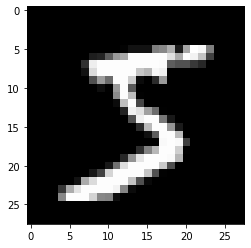

In [188]:
import matplotlib.pyplot as plt
plt.imshow(sample_img.reshape(28,28), cmap='gray')# We could have used squeeze() also but essentially it would have done the same thing.
print('label:', sample_lbl)
print('Random number:', random_no)
print('Sum:', sum_label)

    Creating our Neural network class. This would take two parameters
    1- Image
    2- Random number

    There would be two predicted outputs in a list
    1- Predicted label of the image
    2- Predicted Sum

In [233]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    #####################################################################
    ## This section is for the image and its label
    #####################################################################
    self.conv1 = nn.Conv2d(1, 6, 3, padding=1) 
    self.conv2 = nn.Conv2d(6, 12, 3, padding=1)
    #self.pool1 = nn.MaxPool2d(2, 2)
    self.conv3 = nn.Conv2d(12, 24, 3, padding=1)
    self.pool1 = nn.MaxPool2d(2, 2)
    self.conv4 = nn.Conv2d(24, 24, 3, padding=1)
    self.pool2 = nn.MaxPool2d(2, 2)
    self.conv5 = nn.Conv2d(24, 12, 3)
    self.conv6 = nn.Conv2d(12, 10, 3)
    self.conv7 = nn.Conv2d(10, 10, 3)

    
    #####################################################################
    ## This section is for the random number and its Sum
    #####################################################################
    self.rnd_fc1 = nn.Linear(in_features=10, out_features=32)
    self.rnd_fc2 = nn.Linear(in_features=32, out_features=64)
    self.rnd_out = nn.Linear(in_features=64, out_features=18)
  
  def forward(self,img,random_num): # Takes in two parameters (batch of Images and batch of random number)
    # input layer
    x = img
    y = random_num
    
    #####################################################################
    ## This section is for the image label prediction
    #####################################################################
    # conv1 layer
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = self.pool1(x)
    x = F.relu(self.conv4(x))
    x = self.pool2(x)
    #x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
    x = F.relu(self.conv6(F.relu(self.conv5(x))))
    x = F.relu(self.conv7(x))
    # output layer
    x = x.view(-1, 10)

    # output layer
    #x = self.out(x)
    # x = F.softmax(x, dim=1)

    #####################################################################
    ## This section is for the random number Sum prediction
    #####################################################################
    y = y.reshape( -1,10)
    # Random sum fc1 layer
    y = self.rnd_fc1(y)
    y = F.relu(y)

    ## Random sum fc2 layer
    y = self.rnd_fc2(y)
    y = F.relu(y)
    #
    ## output layer
    y = self.rnd_out(y)
    

    lst = [x,y]

    return lst

The below lines are just for a sample dry run for one sample dataset

In [264]:
# Sample test run to see how our network runs
sample = next(iter(final_trainset)) 
test_image, test_label, test_rnd, test_rnd_sum = sample

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
test_network = Network().to(device)
print(f"This network is being trained on a {device}")

test_pred = test_network(test_image.reshape(1,1,28,28),test_rnd.reshape(1,10))
print(f'Predicted output for image {test_pred[0].reshape(-1,10)}')
print(f'Prdicted output for Sum {test_pred[1]}')
print(f'Predicted label of image - {test_pred[0].reshape(-1,10).argmax(dim=1)}')
print(f'Actual label - {test_label}')
print(f'Predicted Sum - {test_pred[1].argmax(dim=1)}')
print(f'Actual Sum - {test_rnd_sum}')

This network is being trained on a cpu
Predicted output for image tensor([[0.0000, 0.1256, 0.1111, 0.0341, 0.0000, 0.1054, 0.0000, 0.0996, 0.0018,
         0.0000]], grad_fn=<ViewBackward>)
Prdicted output for Sum tensor([[ 0.0913, -0.0783, -0.0931, -0.1418,  0.0070, -0.0449,  0.0320, -0.0173,
         -0.0905,  0.0837, -0.1514, -0.2219, -0.2330,  0.0459, -0.2009, -0.0437,
          0.0734,  0.0047]], grad_fn=<AddmmBackward>)
Predicted label of image - tensor([1])
Actual label - 5
Predicted Sum - tensor([0])
Actual Sum - 9


    We need to train our network in batches (batch size = 128). The below step does that

In [45]:
train_loader = torch.utils.data.DataLoader(final_trainset # We use our final_trainset where we have the random numbers and Sum
    ,batch_size=128
    ,shuffle=True
)

    Checking if our train loader is ok

In [197]:
batch = next(iter(train_loader)) # Get the first batch from the train loader
print(f'The batch is of type - {type(batch)} and of length - {len(batch)}') # This is list item of 2 (sets of) tensors
batch_img, batch_lbl, batch_rnd, batch_sum = batch
print(f'Total number of batches = {len(train_loader)}')
print(f'Each batch contains a set of {len(batch_img)} images, labels, random numbers and Sums')
print(f'The batch of images are of shape - {batch_img.shape} and batch of labels are of shape - {batch_lbl.shape}')
print(f'The batch of random numbers are of shape - {batch_rnd.shape} and batch of Sum are of shape - {batch_sum.shape}')

The batch is of type - <class 'list'> and of length - 4
Total number of batches = 600
Each batch contains a set of 100 images, labels, random numbers and Sums
The batch of images are of shape - torch.Size([100, 1, 28, 28]) and batch of labels are of shape - torch.Size([100])
The batch of random numbers are of shape - torch.Size([100, 10]) and batch of Sum are of shape - torch.Size([100])


In [47]:
import torch.nn.functional as F
import torch.nn as nn

    The below function generates number of correctly predicted values

In [ ]:
# This function is used for both the image label and Sum
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:
import torch.optim as optim
torch.set_grad_enabled(True) ## Enabling gradient calculation

    Creating instance of our network on GPU (if available) and setting appropriate learning rate



In [252]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
network = Network().to(device)
print(f"This network is being trained on a {device}")
optimizer = optim.Adam(network.parameters(), lr = 0.01)

This network is being trained on a cpu


In [236]:
#This section will run only for one epoch
total_loss = 0
total_correct = 0
total_loss_random_sum = 0
total_correct_random_sum = 0

for batch in train_loader: # Get Batch
    batch_img, batch_lbl, batch_rnd, batch_sum = batch 

    preds = network(batch_img,batch_rnd) # Pass Batch
    loss_img = F.cross_entropy(preds[0].reshape(-1,10), batch_lbl) # Calculate Loss
    loss_random_sum = F.cross_entropy(preds[1], batch_sum) # Calculate Loss

    optimizer.zero_grad() # Remove old gradients
    loss_img.backward() # Calculate Gradients
    loss_random_sum.backward() # Calculate Gradients
    optimizer.step() # Update Weights

    total_loss += loss_img.item()
    total_correct += get_num_correct(preds[0], batch_lbl)
    total_loss_random_sum += loss_random_sum.item()
    total_correct_random_sum += get_num_correct(preds[1], batch_sum)

print(
    "epoch:", 0, 
    "Total correct images predicted:", total_correct, 
    "Loss for image prediction:", total_loss)
print(
    "Total correct random sums predicted:", total_correct_random_sum, 
    "Loss for random sum prediction:", total_loss_random_sum)

epoch: 0 Total correct images predicted: 59800 Loss for image prediction: 8.689128383994095
Total correct random sums predicted: 59208 Loss for random sum prediction: 40.462023260282876


In [247]:
#This section will run only for 10 epochs
for epoch in range(10):
  total_loss = 0
  total_correct = 0
  total_loss_random_sum = 0
  total_correct_random_sum = 0
  
  for batch in train_loader: # Get Batch
      batch_img, batch_lbl, batch_rnd, batch_sum = batch 
  
      preds = network(batch_img,batch_rnd) # Pass Batch
      loss_img = F.cross_entropy(preds[0].reshape(-1,10), batch_lbl) # The image output has been reshaped from -1x10x1x1 to -1x1x10
      loss_random_sum = F.cross_entropy(preds[1], batch_sum) # Calculate Loss
  
      optimizer.zero_grad() # remove old gradients
      loss_img.backward() # Calculate Gradients
      loss_random_sum.backward() # Calculate Gradients
      optimizer.step() # Update Weights
  
      total_loss += loss_img.item()
      total_correct += get_num_correct(preds[0], batch_lbl)
      total_loss_random_sum += loss_random_sum.item()
      total_correct_random_sum += get_num_correct(preds[1], batch_sum)
  
  print(
    "epoch:", epoch, 
    "Total correct images predicted:", total_correct, 
    "Loss for image prediction:", total_loss)
  print(
    "Total correct random sums predicted:", total_correct_random_sum, 
    "Loss for random sum prediction:", total_loss_random_sum)

epoch: 0 Total correct images predicted: 60000 Loss for image prediction: 0.0
Total correct random sums predicted: 60000 Loss for random sum prediction: 0.011571020255360054
epoch: 1 Total correct images predicted: 60000 Loss for image prediction: 0.0
Total correct random sums predicted: 60000 Loss for random sum prediction: 0.004674910798712517
epoch: 2 Total correct images predicted: 60000 Loss for image prediction: 0.0
Total correct random sums predicted: 60000 Loss for random sum prediction: 0.002369497803329068
epoch: 3 Total correct images predicted: 60000 Loss for image prediction: 0.0
Total correct random sums predicted: 60000 Loss for random sum prediction: 0.0013666804522927123
epoch: 4 Total correct images predicted: 60000 Loss for image prediction: 0.0
Total correct random sums predicted: 60000 Loss for random sum prediction: 0.0008430248258264328
epoch: 5 Total correct images predicted: 60000 Loss for image prediction: 0.0
Total correct random sums predicted: 60000 Loss fo

In [ ]:
#################################################################################################################